In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

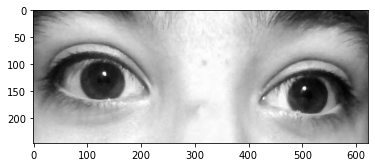

In [2]:
kader_eye=cv2.imread('kaderiris.jpeg')
kader_eye= cv2.cvtColor(kader_eye, cv2.COLOR_BGR2GRAY)
plt.imshow(kader_eye,cmap='gray')

27 193 47 213
423 584 72 233
274 331 157 214


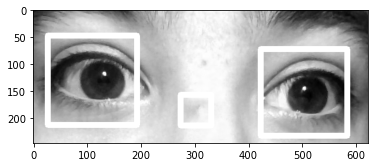

In [3]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')
def detect_eye(img):
    face_img=img.copy()
    eyes=eye_cascade.detectMultiScale(face_img,scaleFactor=1.055,minNeighbors=7)
    
    for(x,y,w,h) in eyes:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        print (x,(x+w),y,(y+h))
    return face_img

result=detect_eye(kader_eye)
plt.imshow(result,cmap='gray')

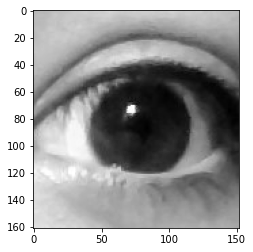

In [4]:
right_eye=kader_eye[72:233,432:584]
plt.imshow(right_eye,cmap='gray')

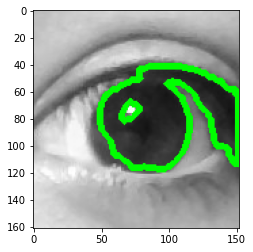

In [5]:
ret,thresh= cv2.threshold(right_eye, 70, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh,cmap='gray')
kernel = np.ones((7,7),np.uint8)
morp= cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel)
plt.imshow(morp,cmap='gray')
target = cv2.cvtColor(right_eye.copy(), cv2.COLOR_GRAY2BGR)
temp = target.copy()
image, contours, hierarchy = cv2.findContours(morp.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(temp,contours,-1,(0,255,0),3)
plt.imshow(temp)

In [6]:
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1, minDist=150, param1=100, param2=10, minRadius=20)
# Draw circles
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x,y,r) in circles:
        cv2.circle(right_eye, (x,y), r, (0,255,0), 3)
        
cv2.imshow('image', right_eye)
cv2.waitKey()

-1